In [101]:
import matplotlib.pyplot as plt
import csv
from statistics import mean

In [102]:
def classifier_perf_metric(cl):
  acc=[]
  precision=[]
  recall=[]
  f1_score=[]
  batch = []
  with open(cl+'.csv', 'r') as file:
    data = csv.reader(file, delimiter = ',')

    for row in data:
      #r2_score.append(float(row[0]))
      acc.append(float(row[1]))
      precision.append(float(row[2]))
      recall.append(float(row[3]))
      f1_score.append(float(row[4]))
  batch = [i+1 for i in range(len(acc))]
  plot_batch_vs_acc(acc, precision, recall, f1_score, batch)
  file.close()

def classifiers_metric(metric):
  for j in ["1","5","10","15"]:
    classifiers = ["mNB", "bNB", "SGD"]
    metric_flag = 0
    metric_means=[]
    if metric == "accuracy":
      metric_flag = 1
    elif metric == "precision":
      metric_flag = 2
    elif metric == "recall":
      metric_flag = 3
    else:
      metric_flag = 4
    for i in classifiers:
      metric_list=[]
      with open(j+'k/'+i+'.csv', 'r') as file:
        data = csv.reader(file, delimiter = ',')
        for row in data:
            metric_list.append(float(row[metric_flag]))
        metric_means.append(mean(metric_list))
    plt.bar(classifiers, metric_means, color = 'r', label = 'Batch Size='+j+', avg performance for '+metric)
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
  file.close()

In [103]:
'''plt.bar(batch, r2_score, color = 'g', label = 'r2_score for each batch')
plt.xlabel('Batch')
plt.ylabel('r2_score')
plt.legend()
plt.show()'''

"plt.bar(batch, r2_score, color = 'g', label = 'r2_score for each batch')\nplt.xlabel('Batch')\nplt.ylabel('r2_score')\nplt.legend()\nplt.show()"

In [104]:
def plot_batch_vs_acc(acc, precision, recall, f1_score, batch):
  #batch=[1,2,3,4,5,6,7,8,9]
  plt.bar(batch, acc, color = 'r', label = 'accuracy for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.bar(batch, precision, color = 'b', label = 'precision for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

  plt.bar(batch, recall, color = 'y', label = 'recall for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

  plt.bar(batch, f1_score, color = 'm', label = 'f1 score for each batch')
  plt.xlabel('Batch')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()

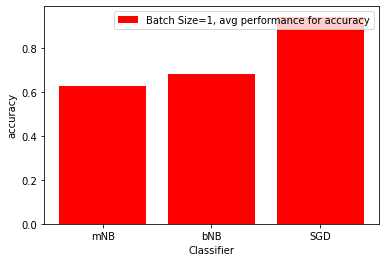

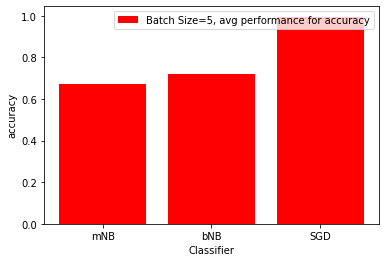

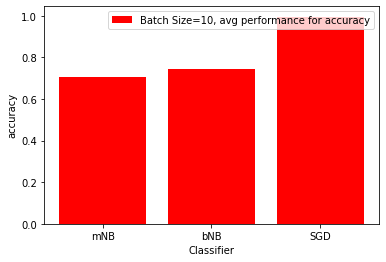

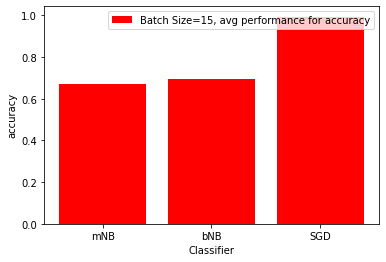

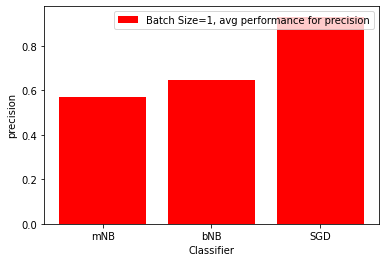

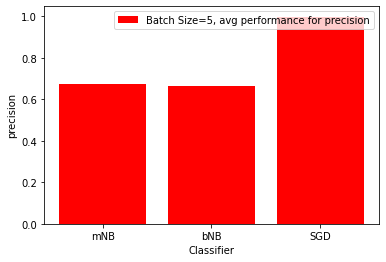

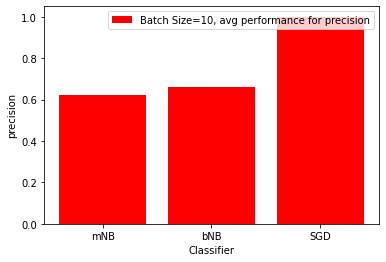

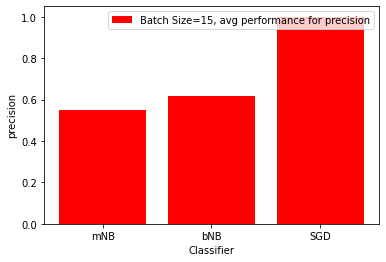

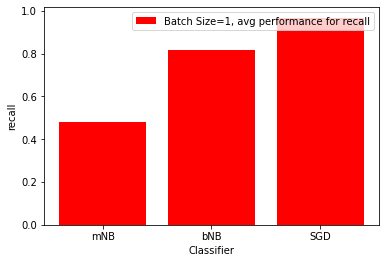

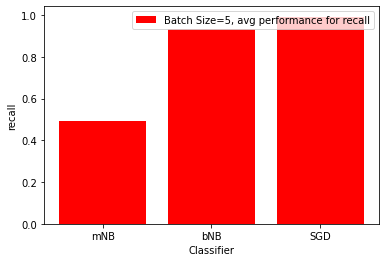

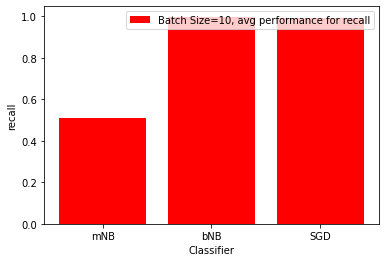

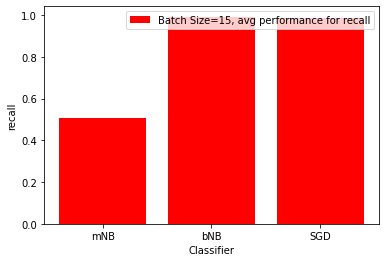

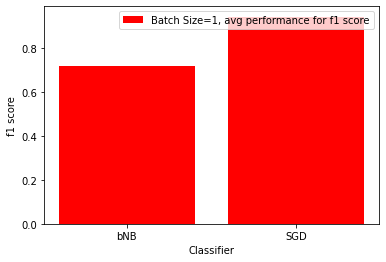

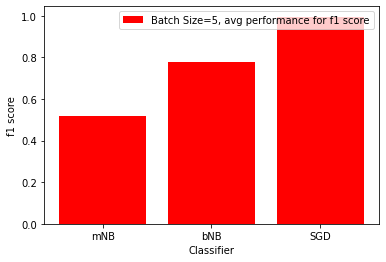

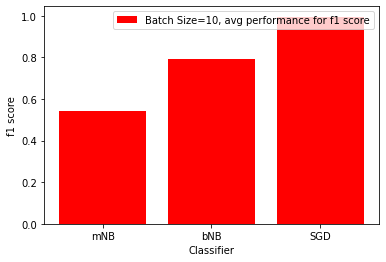

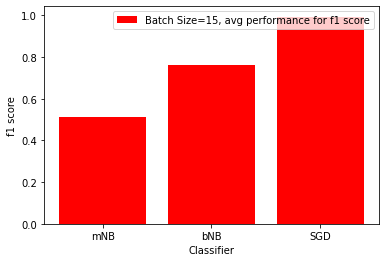

In [105]:
classifiers_metric('accuracy')
classifiers_metric('precision')
classifiers_metric('recall')
classifiers_metric('f1 score')

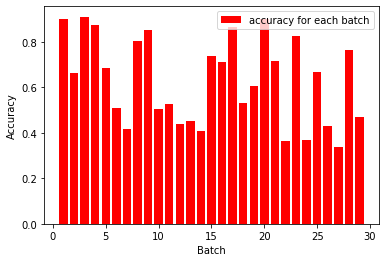

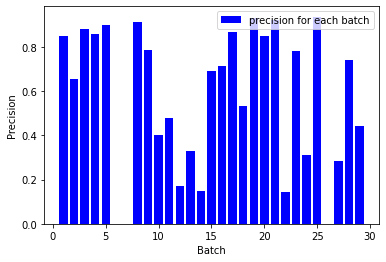

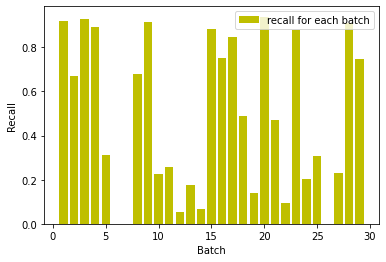

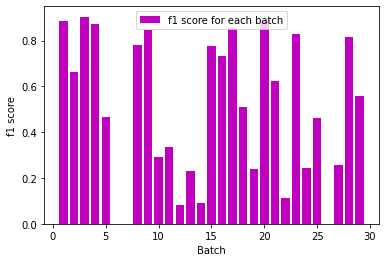

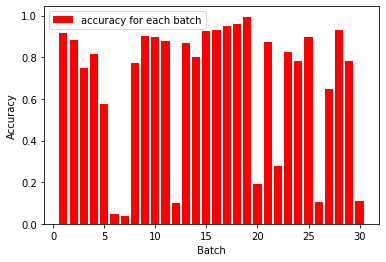

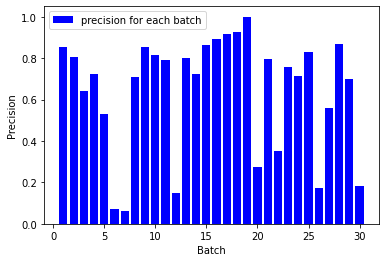

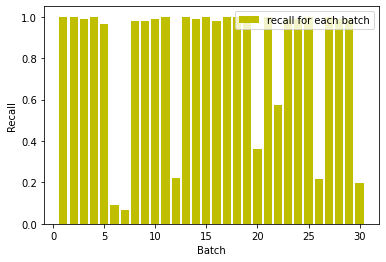

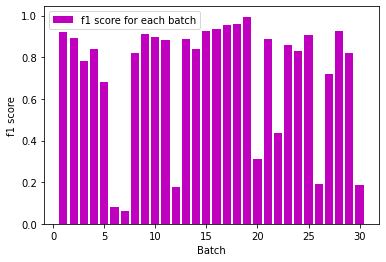

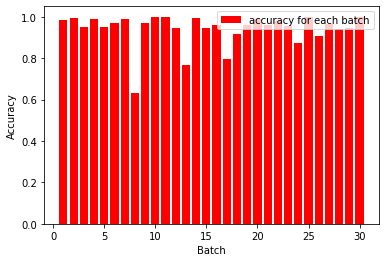

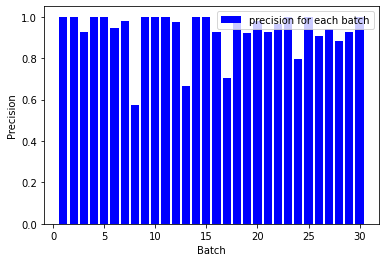

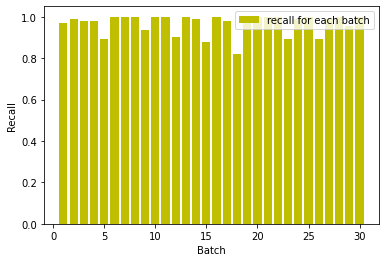

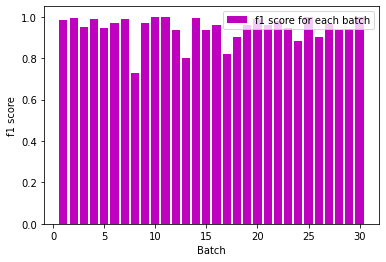

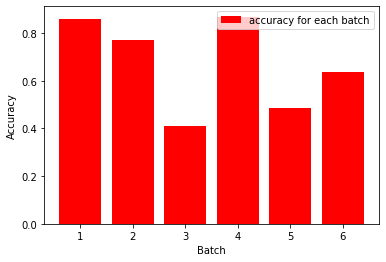

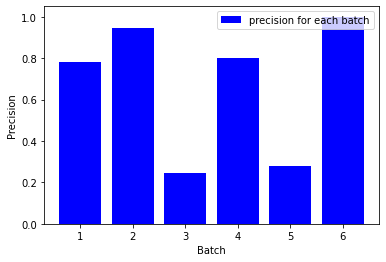

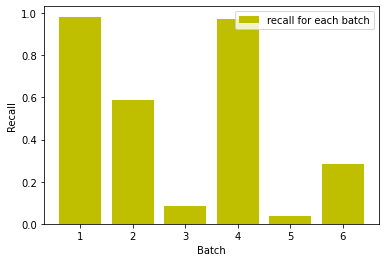

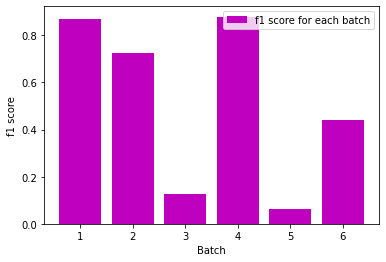

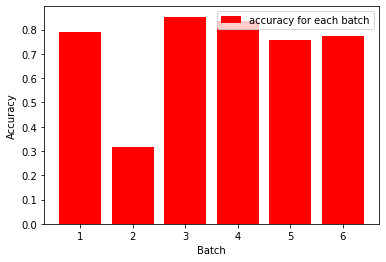

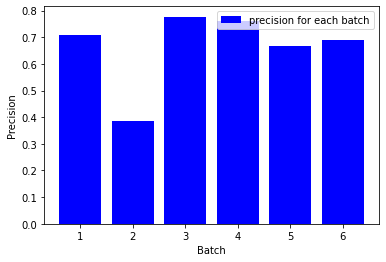

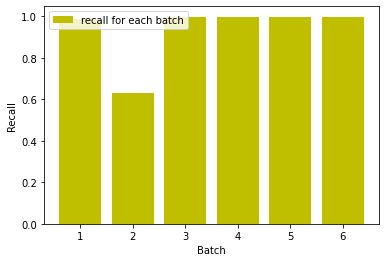

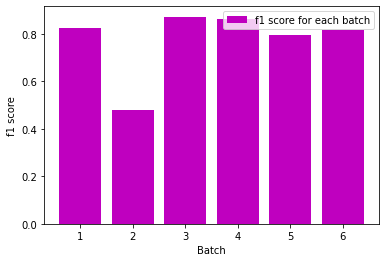

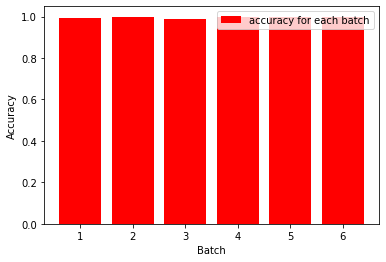

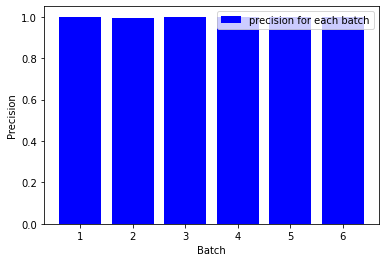

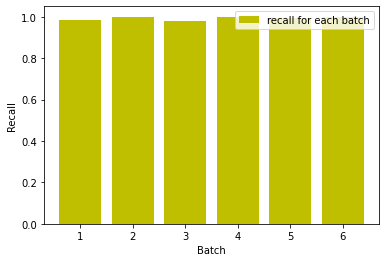

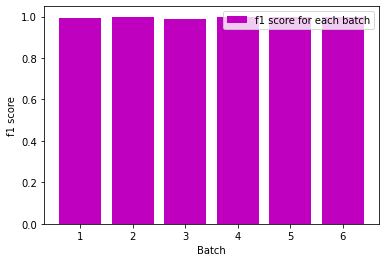

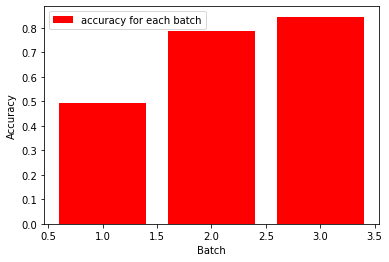

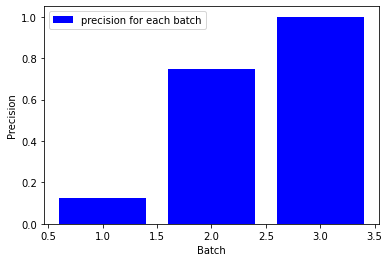

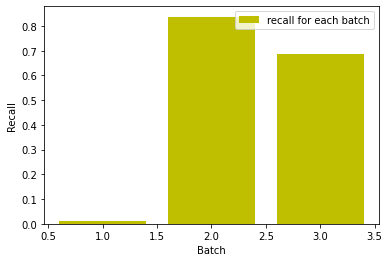

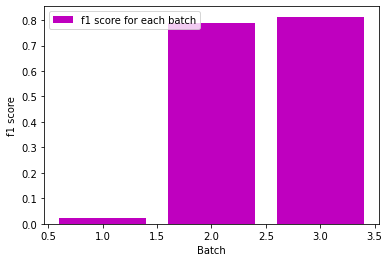

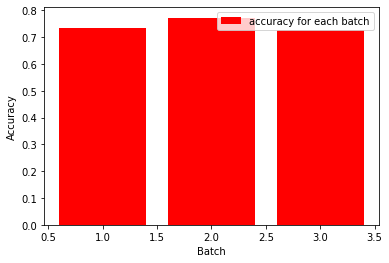

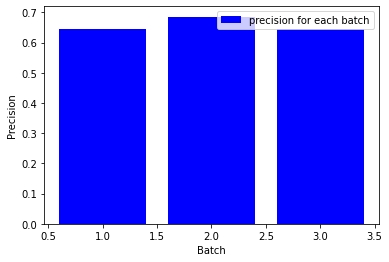

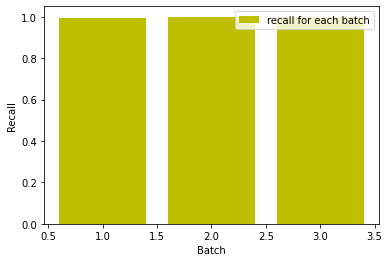

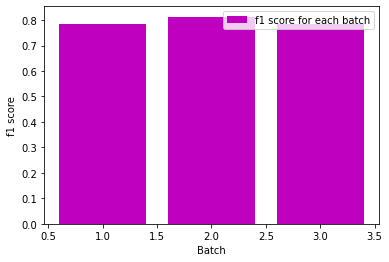

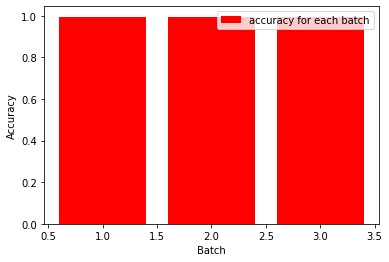

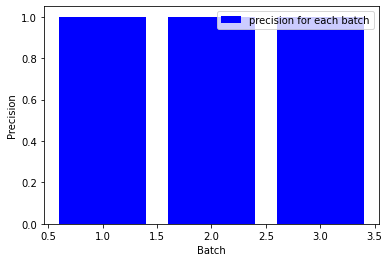

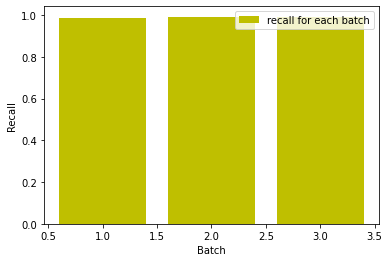

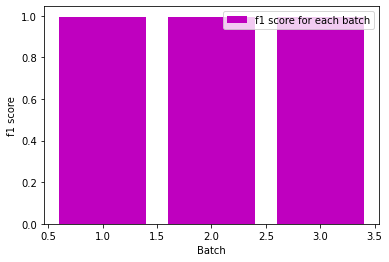

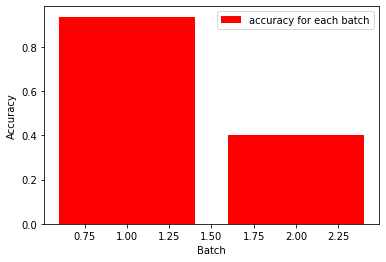

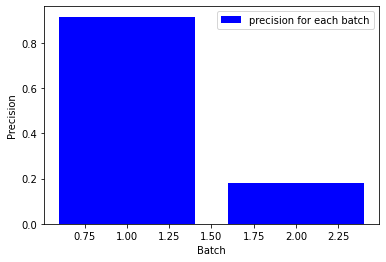

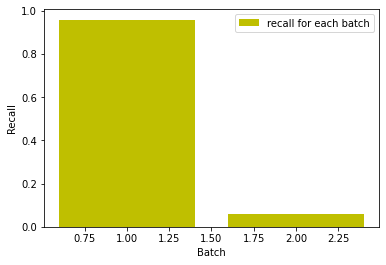

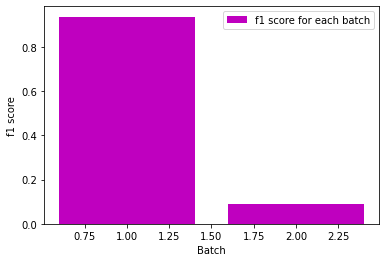

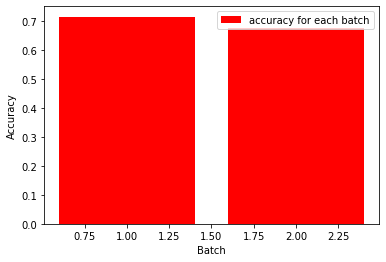

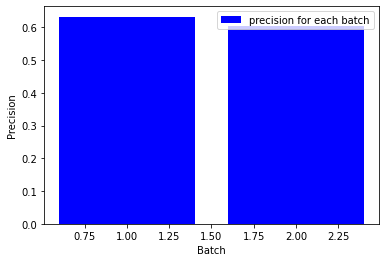

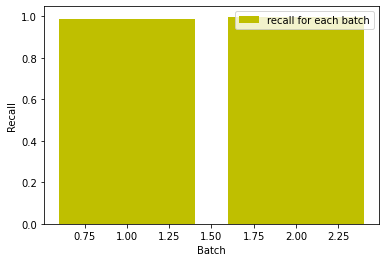

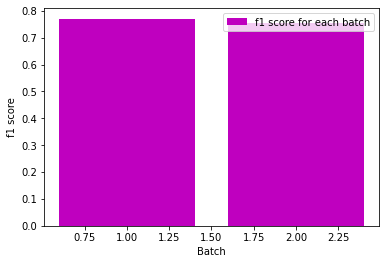

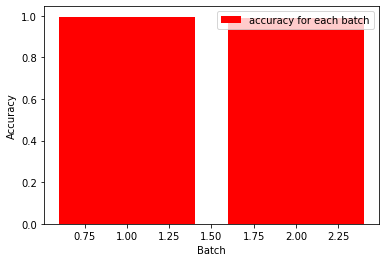

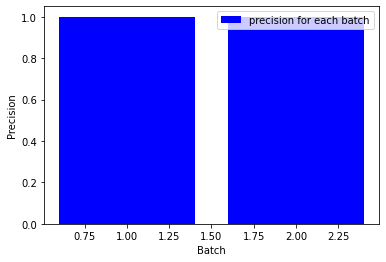

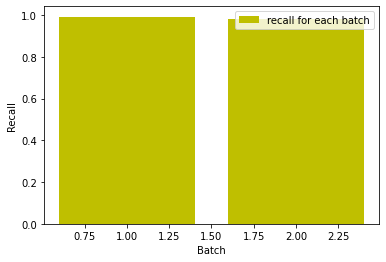

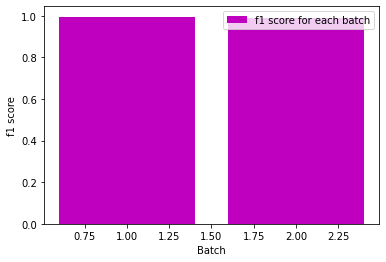

In [106]:
for j in ['1k/', '5k/', '10k/', '15k/']:
  classifier_perf_metric(j+'mNB')
  classifier_perf_metric(j+'bNB')
  classifier_perf_metric(j+'SGD')

In [107]:
dataset_name = 'bnb/bNB_10k'

In [108]:
import pandas as pd
url = f'https://raw.githubusercontent.com/Abhishek4848/Datasets/master/Spark%20streaming%20Metrics/{dataset_name}.csv'
df = pd.read_csv(url,header=None)
df.columns = ['Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [109]:
df

,Score,Accuracy,Precision,Recall,F1 Score
0,-0.067870,0.733300,0.645988,0.993776,0.783000
1,0.088807,0.772214,0.685675,0.999011,0.813205
2,-0.093296,0.726693,0.644770,1.000000,0.784025


In [110]:
def avg_scores(dataset_name):
  url = f'https://raw.githubusercontent.com/Abhishek4848/Datasets/master/Spark%20streaming%20Metrics/{dataset_name}.csv'
  df = pd.read_csv(url,header=None)
  df.columns = ['Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
  return([df['Accuracy'].mean(),df['Precision'].mean(),df['Recall'].mean(),df['F1 Score'].mean()])

In [111]:
bnb_1k = avg_scores("bnb/bNB_10k")